# Data Preparation

Understaning the importance of data preparation, In this notebook I extract class labels from a CSV file to define the target variable, convert all images into a single NumPy array for efficient handling, and save the array in a compact .npz format to optimize training for the machine learning model. This modular approach ensures well-structured, ready-to-use data for successful model training.

In [ ]:
# Import all Modules
import pandas as pd
import numpy as np

# Load CSV Dataset to extrat target data for all images
data = pd.read_csv('csv/BrainTumor.csv')
data.head()

In [ ]:
target = np.array(data['Class'])

# Validate 
print(len(target))
print(target[:5])

## Create Numpy Image Array

Raw images, unlike numerical data in the CSV, aren't directly usable by the model. Data preparation steps like converting the jpg files into a numpy array is necessary to create suitable features (representations) for the model to learn from.

In [4]:
from PIL import Image
import os

def create_image_array(folder_path):
    '''
    Read images from a folder and creates a Numpy array containing them
    
    Args:
        folder_path: Path to the folder containing images
    
    Returns:
        A Numpy array containing the loaded images
    '''

    # number of files in folder
    num_files = len(os.listdir(folder_path))
    
    images = []
    for i in range(1, num_files + 1):
        # Get full image path
        filename = f'Image{i}.jpg'
        image_path = os.path.join(folder_path, filename)
        
        image = np.asarray(Image.open(image_path))
        
        # Append the image to the list
        images.append(image)
    
    # Convert the image to the list
    image_array = np.asarray(images)

    return image_array

def save_to_npz(image_array, filename):
    '''
    Function saves a Numpy array to an npz file
    
    Args:
        image_array: The Numpy array to be saved
        filename: The filename for the npz file
    '''

    np.savez_compressed(filename, images=image_array)

In [40]:
# Convert Images to np array and save it
image_data = create_image_array('images/')
save_to_npz(image_data, 'image_data.npz')

In [ ]:
import matplotlib.pyplot as plt

data = np.load('image_data.npz')
images = data['images']
print(images.shape)

<function matplotlib.pyplot.show(close=None, block=None)>

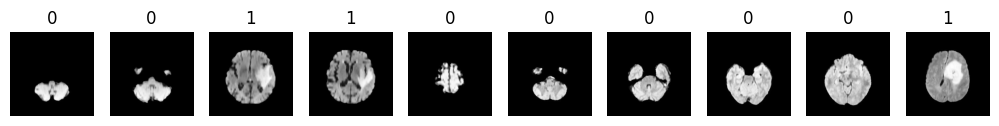

In [9]:
# Plot first 10 images
fig = plt.figure(figsize=(30, 30))
for i in range(10):
    fig.add_subplot(30, 30, i + 1)
    plt.imshow(images[i])
    plt.title(target[i])
    plt.axis('off')
plt.tight_layout()
plt.show